In [1]:
# Import the pandas library
import pandas as pd


In [5]:
# Load the dataset
df = pd.read_excel("Book_Sales.xlsx")


In [9]:
#Explore the dataset
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [10]:
# Check for duplicates
print("Checking for duplicates...")
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Checking for duplicates...
Number of duplicate rows: 0


In [12]:
# Step 2: Check for data types
df.dtypes


,0
Name,object
Author,object
User Rating,float64
Reviews,int64
Price,int64
Year,int64
Genre,object


In [15]:
# Step 3: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [16]:
#get summary statistics for the DataFrame
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [17]:
# number of books per genre
df.groupby("Genre")["Name"].count()

,Name
Genre,
Fiction,240
Non Fiction,310


In [18]:
# average rating per genre
df.groupby("Genre")["User Rating"].mean()

,User Rating
Genre,
Fiction,4.648333
Non Fiction,4.595161


In [19]:
# books per year
df.groupby("Year")["Name"].count()

,Name
Year,
2009,50
2010,50
2011,50
2012,50
2013,50
2014,50
2015,50
2016,50
2017,50


In [22]:
# books with more than 10, 000 reviews
df[df["Reviews"] >= 10000]


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
...,...,...,...,...,...,...,...
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [24]:
# Sort by Books into top 10 highest user rating order
sorted_df = df.sort_values("User Rating", ascending =False)
sorted_df[["Name", "User Rating"]].head(10)

,Name,User Rating
431,The Magnolia Story,4.9
87,Dog Man: Lord of the Fleas: From the Creator o...,4.9
85,Dog Man: Fetch-22: From the Creator of Captain...,4.9
84,Dog Man: Brawl of the Wild: From the Creator o...,4.9
83,Dog Man: Brawl of the Wild: From the Creator o...,4.9
82,Dog Man: A Tale of Two Kitties: From the Creat...,4.9
81,Dog Man and Cat Kid: From the Creator of Capta...,4.9
252,"Oh, the Places You'll Go!",4.9
476,The Very Hungry Caterpillar,4.9
477,The Very Hungry Caterpillar,4.9


In [25]:
# Sort by Books into top 10 highest price order
sorted_df = df.sort_values("Price", ascending =False)
sorted_df[["Name", "Price"]].head(10)

,Name,Price
69,Diagnostic and Statistical Manual of Mental Di...,105
70,Diagnostic and Statistical Manual of Mental Di...,105
473,The Twilight Saga Collection,82
151,Hamilton: The Revolution,54
346,The Book of Basketball: The NBA According to T...,53
159,Harry Potter Paperback Box Set (Books 1-7),52
273,Publication Manual of the American Psychologic...,46
271,Publication Manual of the American Psychologic...,46
272,Publication Manual of the American Psychologic...,46
275,Publication Manual of the American Psychologic...,46


In [26]:
#Visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

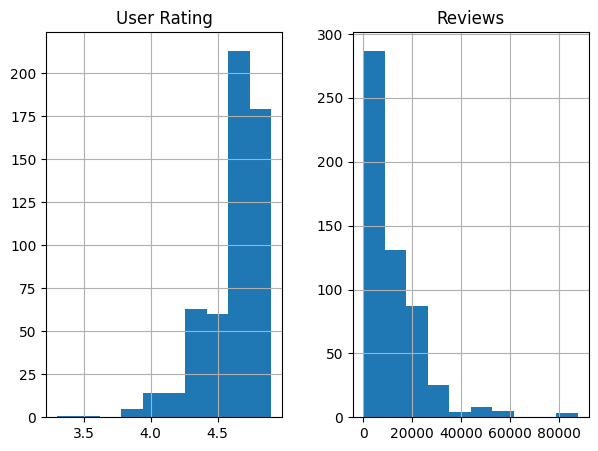

In [44]:
#histogram
df[["User Rating", "Reviews"]].hist(figsize=(7,5))

plt.show()

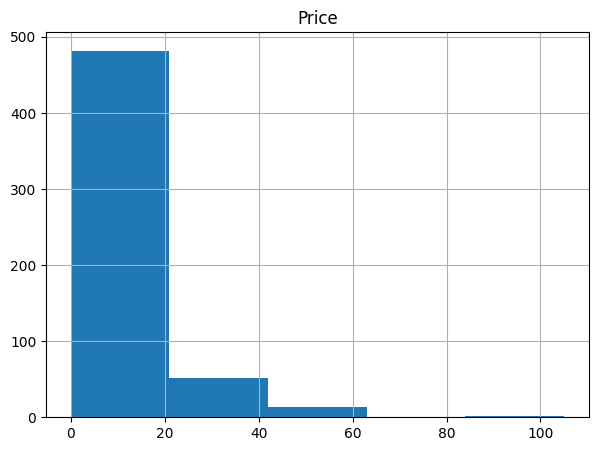

In [45]:
#histogram using bins
df[["Price"]].hist(bins=5, figsize=(7,5))
plt.show()

In [28]:
#max and min reviews
df["Reviews"].agg(["min","max"])

,Reviews
min,37
max,87841


In [29]:
#Correlation Heatmap
df[["Reviews", "User Rating"]].corr()

,Reviews,User Rating
Reviews,1.000000,-0.001729
User Rating,-0.001729,1.000000


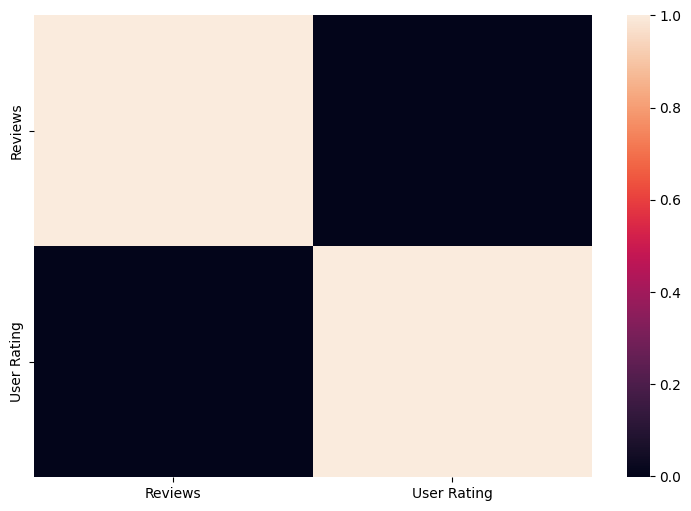

In [30]:
corr = df[["Reviews","User Rating"]].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr)

plt.show()

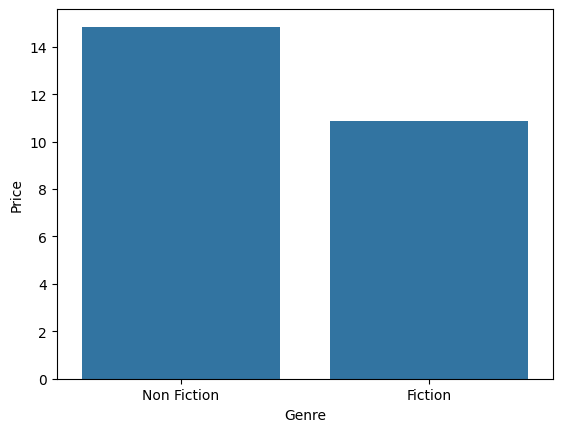

In [31]:
#bar plot
sns.barplot(x="Genre", y="Price", data=df, errorbar=None)

plt.show()